In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import math
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sn
import joblib
import cv2 as cv
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from matplotlib import colors as cma
import pickle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time
from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
iris = datasets.load_iris()

In [ ]:
samples = iris.data[:,:]
labels = iris.target

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df = pd.DataFrame(samples)
df[4] = labels
df = df.sample(frac = 1, random_state=62)
samples = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values

In [ ]:
print(samples.shape, labels.shape)

(150, 4) (150,)


In [ ]:
def splitting(X,y,test_size):
    size = y.size
    train_size = int (size*(1-test_size))
    X_train = X[:train_size,:]
    X_test = X[train_size:,:]
    y_train = y[:train_size]
    y_test = y[train_size:]

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = splitting(samples, labels, 0.3)

# Elbow

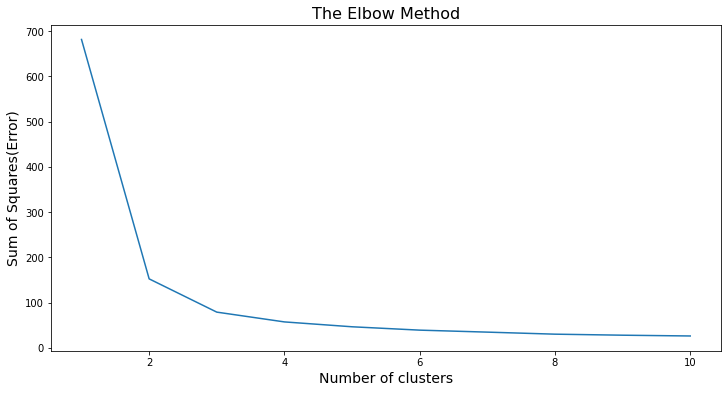

In [ ]:
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(samples)
    ss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), ss)
plt.title('The Elbow Method',size=16)
plt.xlabel('Number of clusters',size=14)
plt.ylabel('Sum of Squares(Error)',size=14)
plt.show()

# Parts 3, 4

In [ ]:
kmeans1 = KMeans(n_clusters = 3, random_state=0)
y_kmeans1 = kmeans1.fit_predict(X_train)

In [ ]:
def plotting_cluster(X, y_kmeans, kmeans, length, width):
  plt.figure(figsize=(6,6))
  plt.scatter(X[y_kmeans == 0, length], X[y_kmeans == 0, width], s = 80, c = 'cyan', label = 'Iris Setosa')
  plt.scatter(X[y_kmeans == 1, length], X[y_kmeans == 1, width], s = 80, c = 'skyblue', label = 'Iris Versicolour')
  plt.scatter(X[y_kmeans == 2, length], X[y_kmeans == 2, width], s = 80, c = 'magenta', label = 'Iris Virginica')

  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, facecolors="none", label = 'Centroids', edgecolors="k")
  plt.title('Clusters',size=16)
  plt.xlabel('Length',size=14)
  plt.ylabel('Width',size=14)
  plt.legend()
  plt.show()

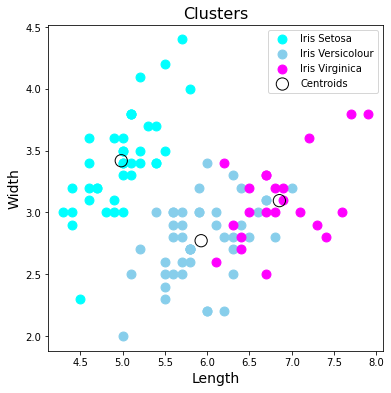

In [ ]:
plotting_cluster(X_train, y_kmeans1, kmeans1, 0, 1)

In [ ]:
y_pred = kmeans1.predict(X_test)
accuracy_score(y_test, y_pred)

0.9111111111111111

In [ ]:
y_pred = kmeans1.predict(X_train)
accuracy_score(y_train, y_pred)

0.8857142857142857

# Rough

In [ ]:
# for i in range(100):
#   # print('On',i)
#   samples = iris.data[:,:]
#   labels = iris.target
#   df = pd.DataFrame(samples)
#   df[4] = labels
#   df = df.sample(frac = 1, random_state=i)
#   samples = df.iloc[:,:-1].values
#   labels = df.iloc[:,-1].values
#   X_train, X_test, y_train, y_test = splitting(samples, labels, 0.3)
#   kmeans1 = KMeans(n_clusters = 3, random_state=0)
#   y_kmeans1 = kmeans1.fit_predict(X_train)
#   ac1 = accuracy_score(y_train,y_kmeans1)
  
#   y_pred = kmeans1.fit_predict(X_test)
#   ac2 = accuracy_score(y_test, y_pred)

#   if (ac1 > 0.85 and ac2 > 0.85):
#     print(i)
#   # print()